In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Masters_Project/Datasets/BRATS17'

/content/drive/My Drive/Masters_Project/Datasets/BRATS17


In [ ]:
!pip install tensorflow==1.4.0
!pip install NiftyNet==0.2.0
!pip install SimpleITK

ERROR: Could not find a version that satisfies the requirement tensorflow==1.4.0 (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2)
ERROR: No matching distribution found for tensorflow==1.4.0
     |████████████████████████████████| 194kB 5.5MB/s 


In [ ]:
!pwd

/content/drive/My Drive/Masters_Project/Datasets/BRATS17


In [ ]:
!git clone https://github.com/taigw/brats17.git

Cloning into 'brats17'...
remote: Enumerating objects: 507, done.
remote: Total 507 (delta 0), reused 0 (delta 0), pack-reused 507
Receiving objects: 100% (507/507), 44.75 MiB | 13.53 MiB/s, done.
Resolving deltas: 100% (316/316), done.
Checking out files: 100% (106/106), done.


In [ ]:
!htop

/bin/bash: htop: command not found


Test folder contains tumors of 2 types:

lioblastoma (GBM/HGG)

lower grade glioma (LGG)

TODO:
Read up on training process and metrics used in 
https://github.com/vkmavani/3D-Brain-Tumor-Auto-Segmentation 

DICE loss is ... 

In [92]:
import nibabel as nib

%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from numpy import asarray
import sys
from PIL import Image, ImageFilter


In [ ]:
seg_filepath = "./brats17/result17/HGG/Brats17_CBICA_AXN_1.nii.gz"
original_scan_path = "./Brats17TrainingData/HGG/Brats17_CBICA_ATX_1/Brats17_CBICA_ATX_1_t1.nii.gz"

In [61]:
seg_data = nib.load(seg_filepath)
seg_data = seg_data.get_fdata()

In [122]:
seg_data.shape

(240, 240, 155)

In [85]:
# Source: https://www.javaer101.com/en/article/36075201.html
def drawContour(m,s,c,RGB):
    """Draw edges of contour 'c' from segmented image 's' onto 'm' in colour 'RGB'"""
    # Fill contour "c" with white, make all else black
    thisContour = s.point(lambda p:p==c and 255)
    # DEBUG: thisContour.save(f"interim{c}.png")

    # Find edges of this contour and make into Numpy array
    thisEdges   = thisContour.filter(ImageFilter.FIND_EDGES)
    thisEdgesN  = np.array(thisEdges)

    # Paint locations of found edges in color "RGB" onto "main"
    m[np.nonzero(thisEdgesN)] = RGB
    return m

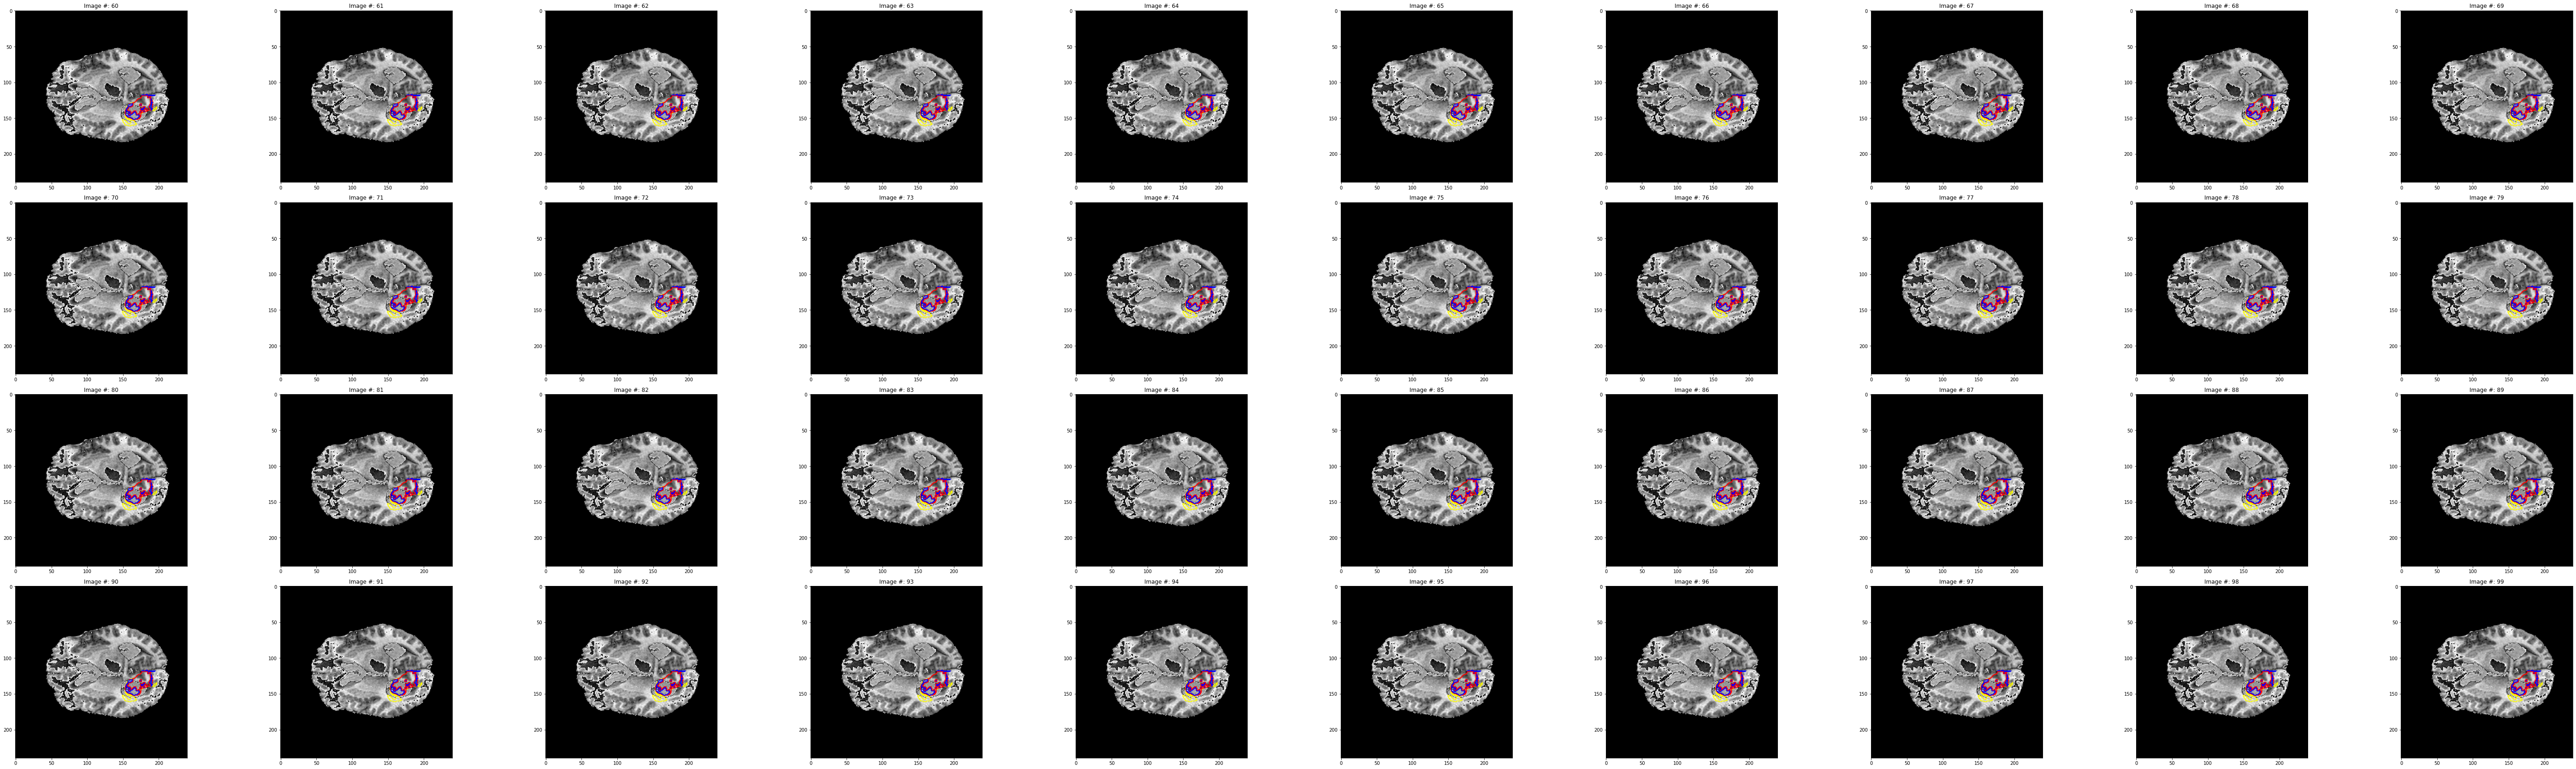

In [126]:
fig=plt.figure(figsize=(80,150))
#fig = plt.figure()
axes=[]
columns = 10
rows = 26
for i in range(60,100):
    axes.append( fig.add_subplot(rows, columns, i+1) )
    subplot_title=("Image #: "+str(i))
    axes[-1].set_title(subplot_title)

    orig_img = Image.fromarray(orig_data[:,:,i].astype('uint8'), 'L').convert('RGB')
    orig_imgN = np.array(orig_img)
    seg = Image.fromarray(seg_data[:,:,i].astype('uint8'), 'L')
    #seg_img = seg_data[:,:,i]
    #orig_data = orig_data[:,:,i]
    orig_imgN = drawContour(mainN,seg,1,(255,0,0))   # draw contour 1 in red -- Tumor Core
    orig_imgN = drawContour(mainN,seg,2,(255,255,0)) # draw contour 2 in yellow -- Full Tumor
    orig_imgN = drawContour(mainN,seg,4,(0,0,255)) # draw contour 2 in yellow -- Spread region
    #fig.add_subplot(rows, columns, orig_imgN)

    plt.imshow(img)
fig.tight_layout()
plt.show()

In [ ]:
#np.set_printoptions(threshold=sys.maxsize)
#print (asarray(seg_data[:,:,70]))

In [117]:
#plt.imshow(seg_data[:,:,70])

In [ ]:
# https://stackoverflow.com/questions/57576686/how-to-overlay-segmented-image-on-top-of-main-image-in-python


In [112]:
# RAW CODE TO OVERLAY THE SEGMENTATION MAPS

orig_data = nib.load(original_scan_path)
orig_data = orig_data.get_fdata()
main = Image.fromarray(orig_data[:,:,70].astype('uint8'), 'L').convert('RGB')
mainN = np.array(main)

seg = Image.fromarray(seg_data[:,:,70].astype('uint8'), 'L')

mainN = drawContour(mainN,seg,1,(255,0,0))   # draw contour 1 in red
mainN = drawContour(mainN,seg,2,(255,255,0)) # draw contour 2 in yellow
mainN = drawContour(mainN,seg,4,(0,0,255)) # draw contour 2 in yellow

img=Image.fromarray(mainN)

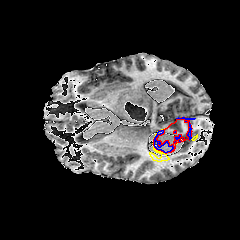

In [116]:
img

In [121]:
mainN.shape

(240, 240, 3)

latest test segmentation file: Brats17_CBICA_ABH_1